In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import pickle
import imageio

from scipy.spatial import cKDTree

import pygmt
import numpy as np
import pandas as pd
import xarray as xr
from numpy import deg2rad, sin, cos, meshgrid, gradient

from fcts import *

from pygmt.datasets import load_earth_relief

In [3]:
dt = 5
ntimes = -np.arange(-265,5,dt)

curve = 'smooth' 
with open('pickle/destroy_'+curve+'.pkl', 'rb') as f:
    destroyDf1 = pickle.load(f)
with open('pickle/remain_'+curve+'.pkl', 'rb') as f:
    remainDf1 = pickle.load(f) 
with open('pickle/preserve_'+curve+'.pkl', 'rb') as f:
    preservedData1 = pickle.load(f)
    preservedData1[-1][0] = preservedData1[-1][1]
with open('pickle/id1_'+curve+'.pkl', 'rb') as f:
    id1_1 = pickle.load(f)
with open('pickle/id2_'+curve+'.pkl', 'rb') as f:
    id2_1 = pickle.load(f)
    
remainDf1[0]

,lon,lat,wmean,area
0,-141.847360,-80.045832,9.686170,5.798454e+06
1,-141.821466,-80.047301,10.162937,5.798454e+06
2,-141.795579,-80.048775,10.547067,5.798454e+06
3,-141.769699,-80.050256,10.653505,5.798454e+06
4,-141.743827,-80.051742,10.759830,5.798454e+06
...,...,...,...,...
447755,150.952280,59.546915,14.716087,2.180213e+07
447756,150.918470,59.542452,14.582400,2.180213e+07
447757,150.884685,59.537951,14.448769,2.180213e+07
447758,150.850924,59.533413,14.342140,2.180213e+07


In [56]:
# destroyDf1[0]

In [4]:
def interpData2(data,sXYZ,meshXYZ,ngbh=1,distmax=1.e8):
    ptree = cKDTree(sXYZ)
    distNbghs, idNbghs = ptree.query(meshXYZ, k=ngbh)
    farIDs = np.where(distNbghs>distmax)[0]
    nval = data[idNbghs]
    nval[farIDs] = np.nan
    return nval

In [5]:
Rearth = 6371.*1000.0
ds = xr.open_dataset('reconstructMaps/erodep265Ma.nc').copy()
glon = ds.longitude.values
glat = ds.latitude.values
glons, glats = np.meshgrid(glon, glat)
lonlat = np.empty((len(glons.ravel()), 2))
nlonlat = np.empty((len(glons.ravel()), 2))
lonlat[:, 0] = glons.ravel()
lonlat[:, 1] = glats.ravel()

mvlonlat = lonlat.copy()
meshXYZ = polarToCartesian(Rearth, lonlat[:, 0], lonlat[:, 1])

In [6]:
curve = 'foster'
with open('pickle/destroy_'+curve+'.pkl', 'rb') as f:
    destroyDf2 = pickle.load(f)
with open('pickle/remain_'+curve+'.pkl', 'rb') as f:
    remainDf2 = pickle.load(f) 
with open('pickle/preserve_'+curve+'.pkl', 'rb') as f:
    preservedData2 = pickle.load(f)
    preservedData2[-1][0] = preservedData2[-1][1]
with open('pickle/id1_'+curve+'.pkl', 'rb') as f:
    id1_2 = pickle.load(f)
with open('pickle/id2_'+curve+'.pkl', 'rb') as f:
    id2_2 = pickle.load(f)

step = 0

for step in range(len(remainDf2)):  
    
    t = ntimes[step]
    remain = remainDf2[step].copy()
    rdf = remain.loc[remain['wmean'] > 0]
    testlon = rdf['lon'].values
    testlat = rdf['lat'].values
    wmean = rdf['wmean'].values #*rdf['area'].values/1000.
    lands = id2_2[step]

    sXYZ = polarToCartesian(Rearth, testlon, testlat)
    shape = ds['erate'].shape
    # newval = interpData(wmean, meshXYZ, sXYZ, ngbh=1).reshape(shape)
    newval = interpData2(wmean,sXYZ,meshXYZ,ngbh=1,distmax=20000).reshape(shape)

    ds['wmean'] = (["latitude", "longitude"], newval.reshape(shape))
    nds = ds['wmean'].copy()
    nds.to_netcdf('reconstructMaps/'+curve+'_wmean'+str(t)+'Ma.nc')
    nds.close()

KeyboardInterrupt: 

In [ ]:
curve = 'smooth'
with open('pickle/destroy_'+curve+'.pkl', 'rb') as f:
    destroyDf2 = pickle.load(f)
with open('pickle/remain_'+curve+'.pkl', 'rb') as f:
    remainDf2 = pickle.load(f) 
with open('pickle/preserve_'+curve+'.pkl', 'rb') as f:
    preservedData2 = pickle.load(f)
    preservedData2[-1][0] = preservedData2[-1][1]
with open('pickle/id1_'+curve+'.pkl', 'rb') as f:
    id1_2 = pickle.load(f)
with open('pickle/id2_'+curve+'.pkl', 'rb') as f:
    id2_2 = pickle.load(f)

step = 0

for step in range(len(remainDf2)):  
    
    t = ntimes[step]
    remain = remainDf2[step].copy()
    rdf = remain.loc[remain['wmean'] > 0]
    testlon = rdf['lon'].values
    testlat = rdf['lat'].values
    wmean = rdf['wmean'].values #*rdf['area'].values/1000.
    lands = id2_2[step]

    sXYZ = polarToCartesian(Rearth, testlon, testlat)
    shape = ds['erate'].shape
    # newval = interpData(wmean, meshXYZ, sXYZ, ngbh=1).reshape(shape)
    newval = interpData2(wmean,sXYZ,meshXYZ,ngbh=1,distmax=20000).reshape(shape)

    ds['wmean'] = (["latitude", "longitude"], newval.reshape(shape))
    nds = ds['wmean'].copy()
    nds.to_netcdf('reconstructMaps/'+curve+'_wmean'+str(t)+'Ma.nc')
    nds.close()

In [24]:
ptree = cKDTree(sXYZ)
distNbghs, idNbghs = ptree.query(meshXYZ, k=1)

In [43]:
closeIDs = np.where(distNbghs>20000)[0]

In [44]:
nval = wmean[idNbghs]
nval[closeIDs] = np.nan

In [38]:
len(np.where(distNbghs<20000)[0]),len(distNbghs),len(wmean)

(624976, 6485401, 447760)

In [45]:
ds['wmean'] = (["latitude", "longitude"], nval.reshape(shape))
nds = ds['wmean'].copy()
nds.to_netcdf('test'+str(t)+'Ma.nc')
nds.close()

In [46]:
# ds['wmean'].plot()

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


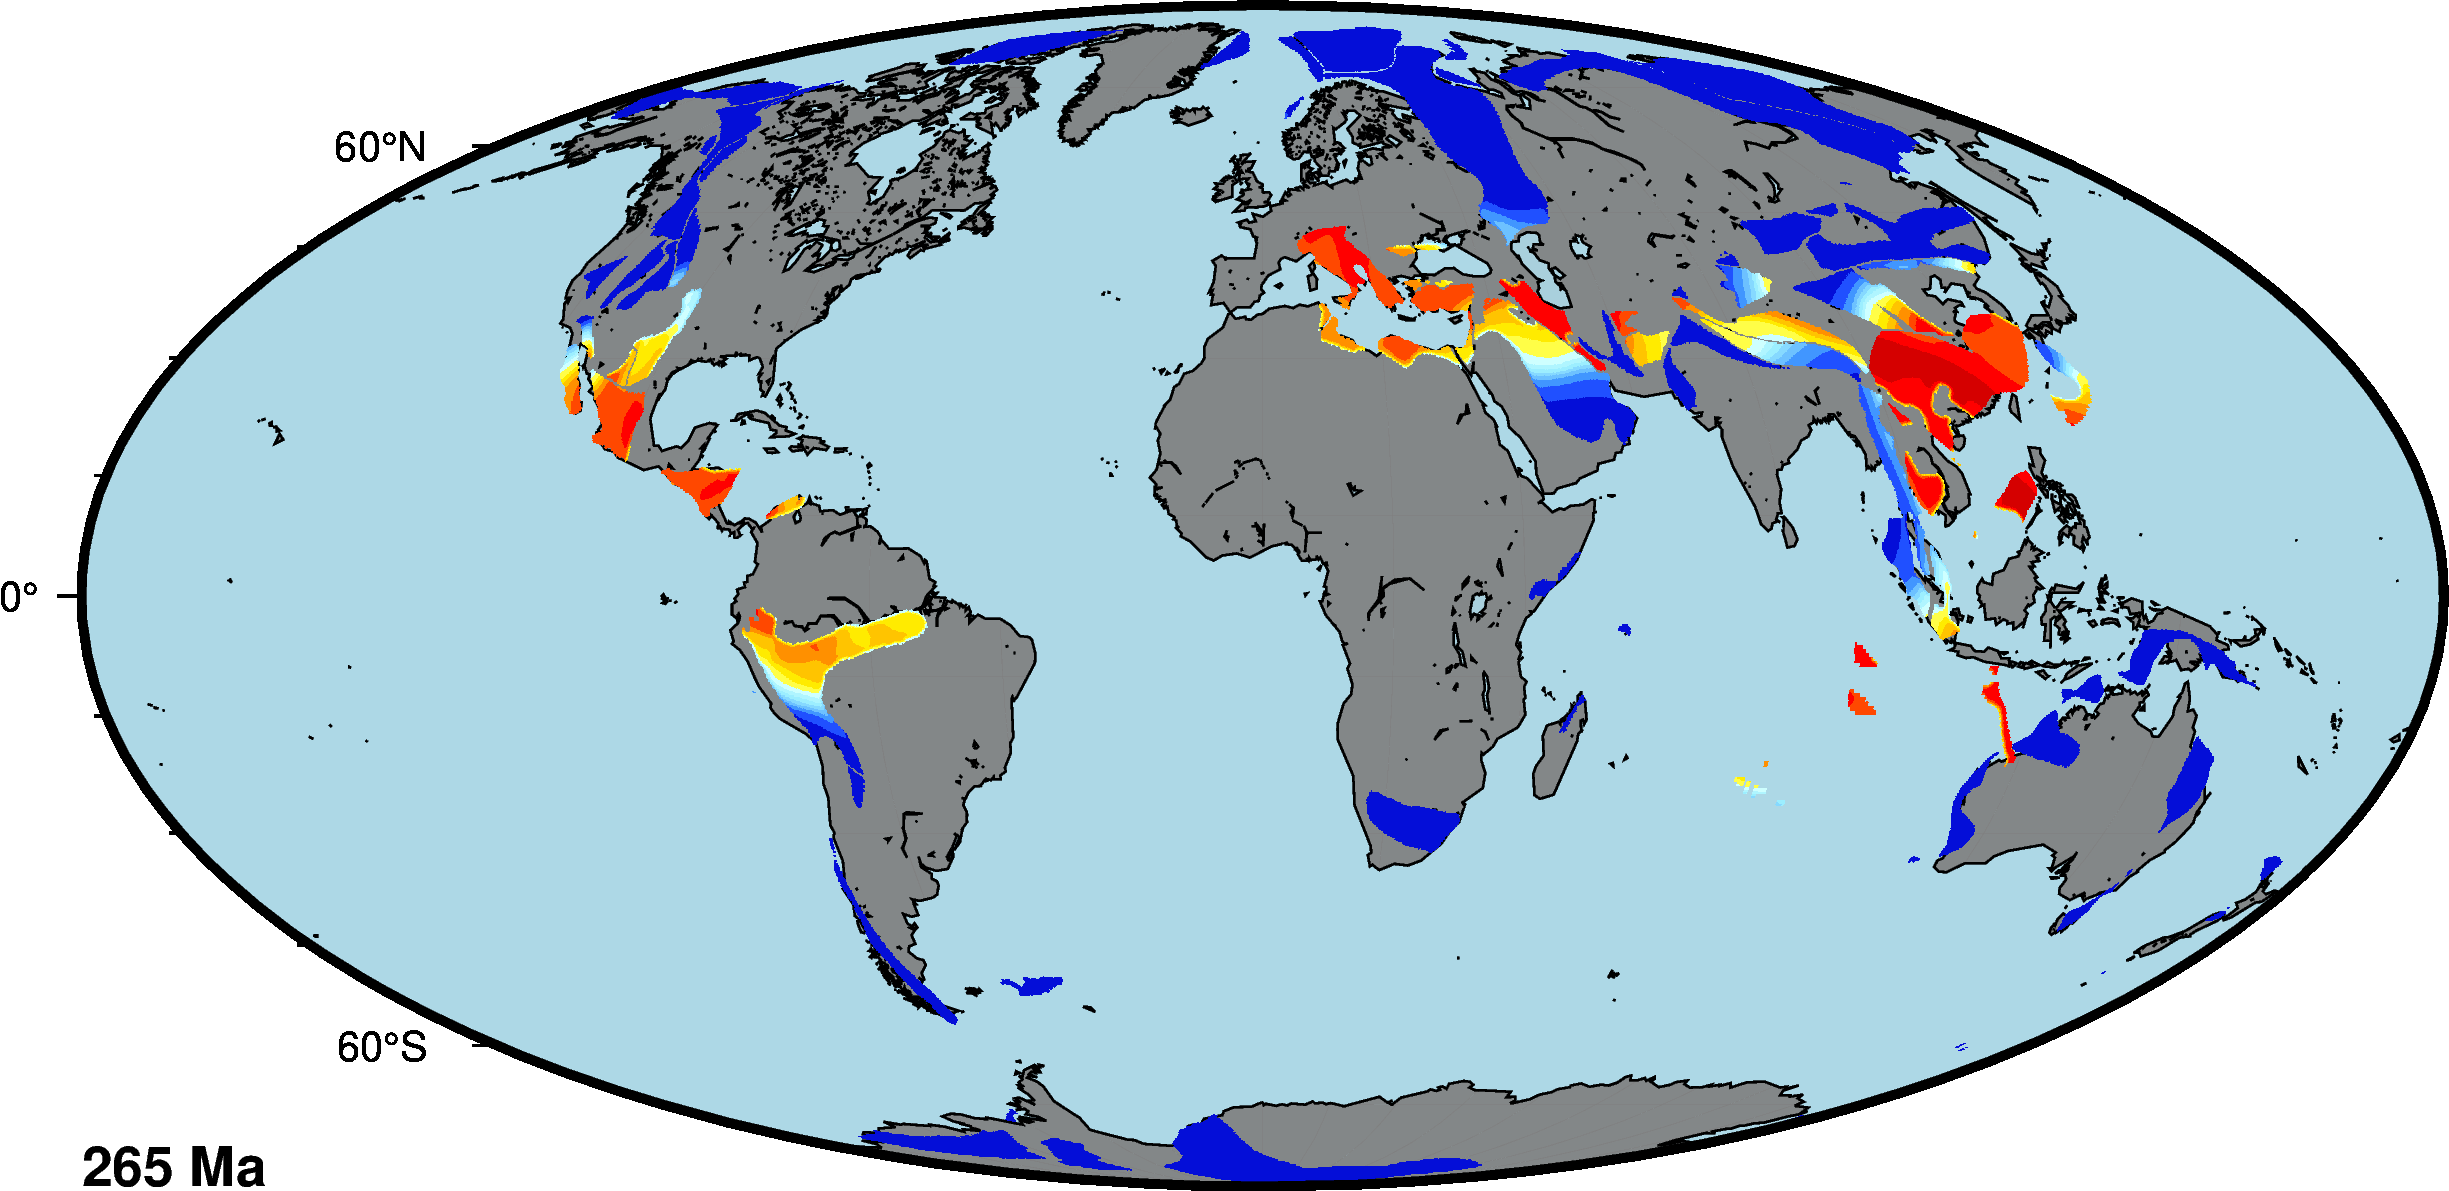

In [47]:
with pygmt.config(FONT='6p,Helvetica,black',
                  COLOR_FOREGROUND="red", 
                  COLOR_BACKGROUND="blue"):
    fig.basemap(region='d', projection='W12c', frame='af')
    fig.coast(land="gray50", water="#ADD8E6", transparency=10)
    fig.coast(shorelines="0.3p,black") #,borders=["1/0.01p,black"])
    pygmt.makecpt(cmap="panoply", series=[0,1000])
    fig.grdimage(ds['wmean'], cmap=True, shading=False,frame=True,nan_transparent=True)
fig.show(width=700,dpi=500)

In [100]:
# Rearth = 6371.*1000.0
# grid = load_earth_relief(resolution="06m", registration="gridline")
# glon = grid.lon.values
# glat = grid.lat.values
# glons, glats = np.meshgrid(glon, glat)
# lonlat = np.empty((len(glons.ravel()), 2))
# lonlat[:, 0] = glons.ravel()
# lonlat[:, 1] = glats.ravel()
# meshXYZ = polarToCartesian(Rearth, lonlat[:, 0], lonlat[:, 1])
# elev = grid.values.ravel()

# id1 = []
# id2 = []
# for k in range(len(remainDf)):    
#     remain = remainDf[k].copy()
#     rdf = remain.loc[remain['wmean'] > 0]
#     testlon = rdf['lon'].values
#     testlat = rdf['lat'].values
#     wmean = rdf['wmean'].values
#     area = rdf['area'].values
#     sXYZ = polarToCartesian(Rearth, testlon, testlat)
#     newval = interpData(elev, sXYZ, meshXYZ, ngbh=1)
#     landIDs1 = np.where(newval>0)[0]
#     landIDs2 = np.where(np.logical_and(newval>0,wmean>500))[0]
#     id1.append(landIDs1)
#     id2.append(landIDs2)
 
# with open('pickle/id1_'+curve+'.pkl', 'wb') as f:
#     pickle.dump(id1, f)    
# with open('pickle/id2_'+curve+'.pkl', 'wb') as f:
#     pickle.dump(id2, f)

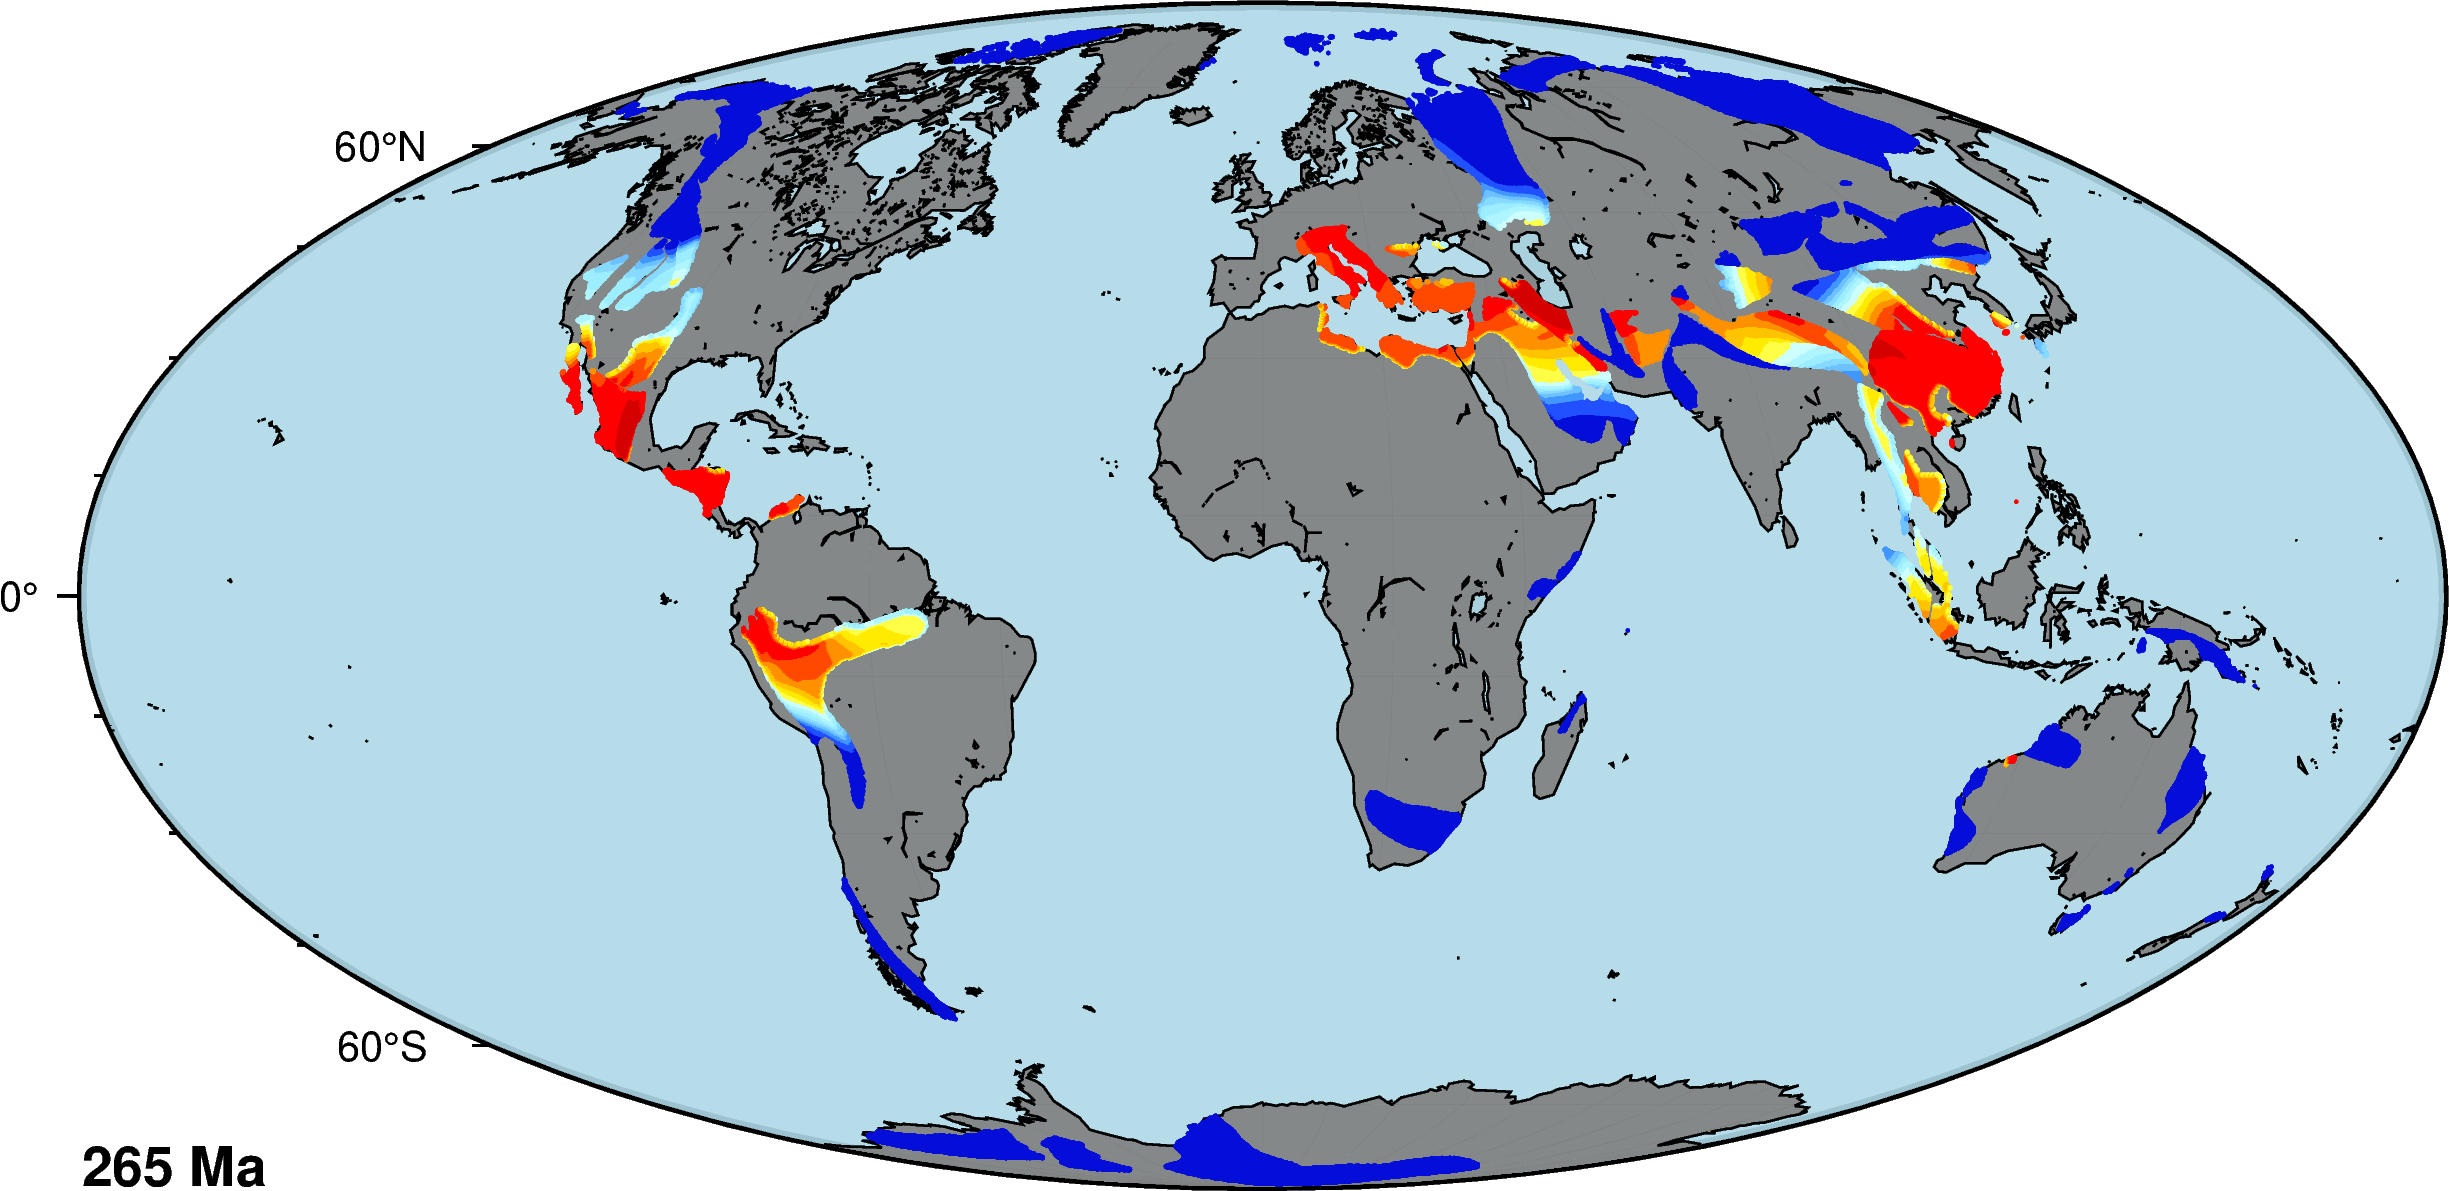

In [4]:
# images = []
# for step in range(len(remainDf1)):
#     remain = remainDf1[step].copy()
#     rdf = remain.loc[remain['wmean'] > 0]
#     testlon = rdf['lon'].values
#     testlat = rdf['lat'].values
#     wmean = rdf['wmean'].values
#     lands = id1_2[step]
#     fig = pygmt.Figure()
#     with pygmt.config(FONT='6p,Helvetica,black',
#                       COLOR_FOREGROUND="red", 
#                       COLOR_BACKGROUND="blue"):
#         fig.basemap(region='d', projection='W12c', frame='af')
#         fig.coast(land="gray50", water="#ADD8E6", transparency=10)
#         fig.coast(shorelines="0.3p,black") #,borders=["1/0.01p,black"])
#         pygmt.makecpt(cmap="panoply", series=[0,1000])
#         fig.plot(
#             x=testlon[lands],
#             y=testlat[lands],
#             style="c0.02c",
#     #         color="red",
#     #         pen="0.1p,red",
#             cmap=True,
#             color=wmean[lands],
#         )    

#         fig.text(
#             text=str(ntimes[step])+' Ma',
#             position="BL",
#             font="8p,Helvetica-Bold,black",
#     #         justify="BL",
#         )
# #     fig.show(width=700,dpi=500)
# #     fig.savefig('figs/'+curve+'_reconstruct_'+str(ntimes[step])+'Ma.png',dpi=500)
# #     images.append(imageio.imread('figs/'+curve+'_reconstruct_'+str(ntimes[step])+'Ma.png'))
# # imageio.mimsave('reconstruct_'+curve+'.gif', images, fps=2)

In [110]:
presev1 = np.zeros(len(preservedData1))
total1 = np.zeros(len(preservedData1))
perc1 = np.zeros(len(preservedData1))
for k in range(len(preservedData1)):
    presev1[k] = preservedData1[k][0]
    total1[k] = preservedData1[k][1]
    perc1[k] = preservedData1[k][0]*100/preservedData1[k][1]
    
presev2 = np.zeros(len(preservedData2))
total2 = np.zeros(len(preservedData2))
perc2 = np.zeros(len(preservedData2))
for k in range(len(preservedData2)):
    presev2[k] = preservedData2[k][0]
    total2[k] = preservedData2[k][1]
    perc2[k] = preservedData2[k][0]*100/preservedData2[k][1]

In [111]:
areaLand1 = np.zeros(len(remainDf1))
areaLandHigh1 = np.zeros(len(remainDf1))
for k in range(len(remainDf1)): 
    remain = remainDf1[k].copy()
    rdf = remain.loc[remain['wmean'] > 0]
    testlon = rdf['lon'].values
    testlat = rdf['lat'].values
    wmean = rdf['wmean'].values
    area = rdf['area'].values
    areaLand1[k] = (wmean[id1_1[k]]*area[id1_1[k]]).sum()/1.e5/1000/1.e6
    areaLandHigh1[k] = (wmean[id2_1[k]]*area[id2_1[k]]).sum()/1.e5/1000/1.e6
    
areaLand2 = np.zeros(len(remainDf2))
areaLandHigh2 = np.zeros(len(remainDf2))
for k in range(len(remainDf2)): 
    remain = remainDf2[k].copy()
    rdf = remain.loc[remain['wmean'] > 0]
    testlon = rdf['lon'].values
    testlat = rdf['lat'].values
    wmean = rdf['wmean'].values
    area = rdf['area'].values
    areaLand2[k] = (wmean[id1_2[k]]*area[id1_2[k]]).sum()/1.e5/1000/1.e6
    areaLandHigh2[k] = (wmean[id2_2[k]]*area[id2_2[k]]).sum()/1.e5/1000/1.e6

array([238.53976774, 235.31543519, 268.42570555, 241.18006218,
       238.63994821, 265.3811335 , 245.66445392, 243.9666138 ,
       258.58497152, 256.38665979, 212.30151746, 217.34412364,
       151.38007993, 151.86841801, 132.38632758, 123.43958883,
       118.47764665,  96.45342011, 175.29120633, 182.99109645,
       212.76843191, 222.91165089, 147.48591821, 106.09863984,
       109.63240967, 126.53454782, 106.77306372, 118.73826316,
       150.48844525, 206.70712687, 196.9418272 , 192.55573302,
       196.13375801, 196.73925297, 220.40519702, 253.34585725,
       251.21248094, 283.77949187, 278.50854783, 192.32934306,
       159.78426898, 126.89875603, 130.05704431, 149.19069369,
        94.02926523,  70.38227281,  65.41368972,  64.37842358,
        53.99778889,  92.65031808,  62.12647535,  70.96848597,
        70.65977553,  97.24240881])

In [ ]:
total = np.mean(total1,total2)

In [148]:
df_bound0 = pd.DataFrame(
    data={
        "x": -ntimes,
        "y": np.mean(np.vstack((total1,total2)),axis=0),
        "y_bound_low": total1,
        "y_bound_upp": total2,
    }
)

    
df_bound1 = pd.DataFrame(
    data={
        "x": -ntimes,
        "y": np.mean(np.vstack((areaLand1,areaLand2)),axis=0),
        "y_bound_low": areaLand1,
        "y_bound_upp": areaLand2,
    }
)

df_bound2 = pd.DataFrame(
    data={
        "x": -ntimes,
        "y": np.mean(np.vstack((areaLandHigh1,areaLandHigh2)),axis=0),
        "y_bound_low": areaLandHigh1,
        "y_bound_upp": areaLandHigh2,
    }
)

df_bound3 = pd.DataFrame(
    data={
        "x": -ntimes,
        "y": np.mean(np.vstack((presev1,presev2)),axis=0),
        "y_bound_low": presev1,
        "y_bound_upp": presev2,
    }
)

df_bound4 = pd.DataFrame(
    data={
        "x": -ntimes,
        "y": np.mean(np.vstack((perc1,perc2)),axis=0),
        "y_bound_low": perc1,
        "y_bound_upp": perc2,
    }
)

In [134]:
percfile = 'data/percentPhotozoan_foster.csv'
df = pd.read_csv(percfile)
totObs = df['PARED totObs'] 

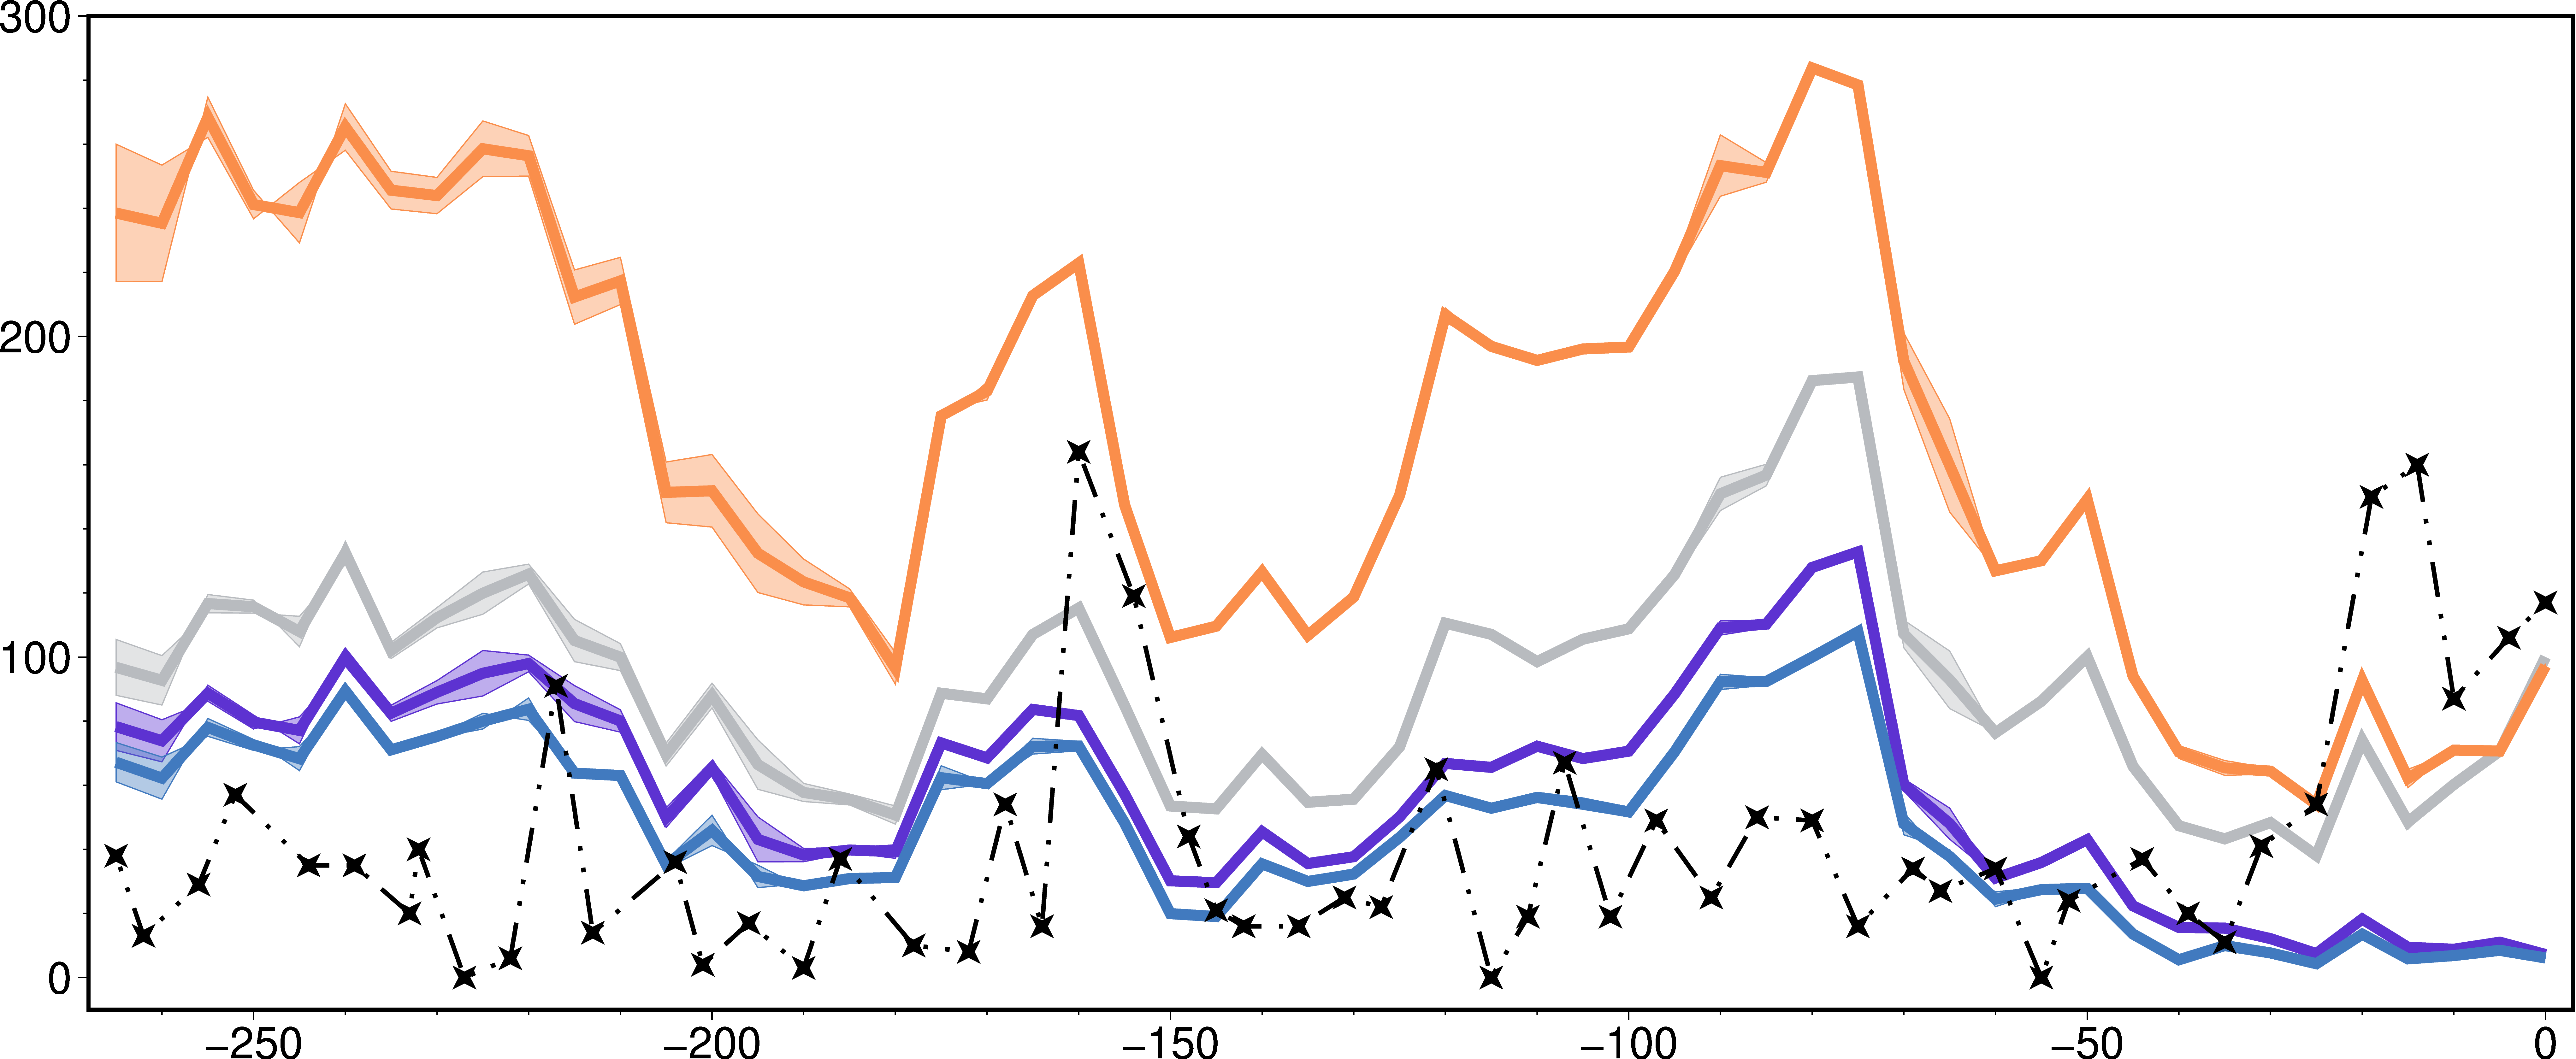

In [155]:
fig = pygmt.Figure()
pygmt.config(
    MAP_FRAME_WIDTH="0.5p",
    MAP_FRAME_TYPE="fancy",
)
font = "4p,Helvetica-Bold"

with pygmt.config(FONT='20p,Helvetica,black'):
    fig.basemap(region=[-268, 3, -10, 300], projection="X40c/16c", frame='af')
    
    fig.plot(data=df_bound1, close="+b+p0.5p,#5d32d1", 
             color="#5d32d1@60", pen="1p,#5d32d1")    
    fig.plot(
        frame="a",
        x=-ntimes,
        y=np.mean(np.vstack((areaLand1,areaLand2)),axis=0),
        pen="5p,#5d32d1",
    )

    fig.plot(data=df_bound2, close="+b+p0.5p,#417abf", 
             color="#417abf@60", pen="1p,#417abf")    
    fig.plot(
        frame="a",
        x=-ntimes,
        y=np.mean(np.vstack((areaLandHigh1,areaLandHigh2)),axis=0),
        pen="5p,#417abf",
    )
    
    
    fig.plot(data=df_bound3, close="+b+p0.5p,#b8bbbf", 
             color="#b8bbbf@60", pen="1p,#b8bbbf")    
    fig.plot(
        frame="a",
        x=-ntimes,
        y=np.mean(np.vstack((presev1,presev2)),axis=0),
        pen="5p,#b8bbbf",
    )
    
    fig.plot(data=df_bound0, close="+b+p0.5p,#fa8e4b", 
             color="#fa8e4b@60", pen="1p,#fa8e4b")    #fa8e4b
    fig.plot(
        frame="a",
        x=-ntimes,
        y=np.mean(np.vstack((total1,total2)),axis=0),
        pen="5p,#fa8e4b",
    )
    
    fig.plot(
        frame="a",
        x=-df['Time (Ma)'],
        y=totObs,
        pen="2p,black,..-",
    )
    
    fig.plot(
        x=-df['Time (Ma)'],
        y=totObs,
        style="kstar4/0.3c", 
        color="black", 
        pen="1p,black",
    )
fig.show(dpi=500, width=1000)
fig.savefig('reconstructReef.png',dpi=500, transparent=True)

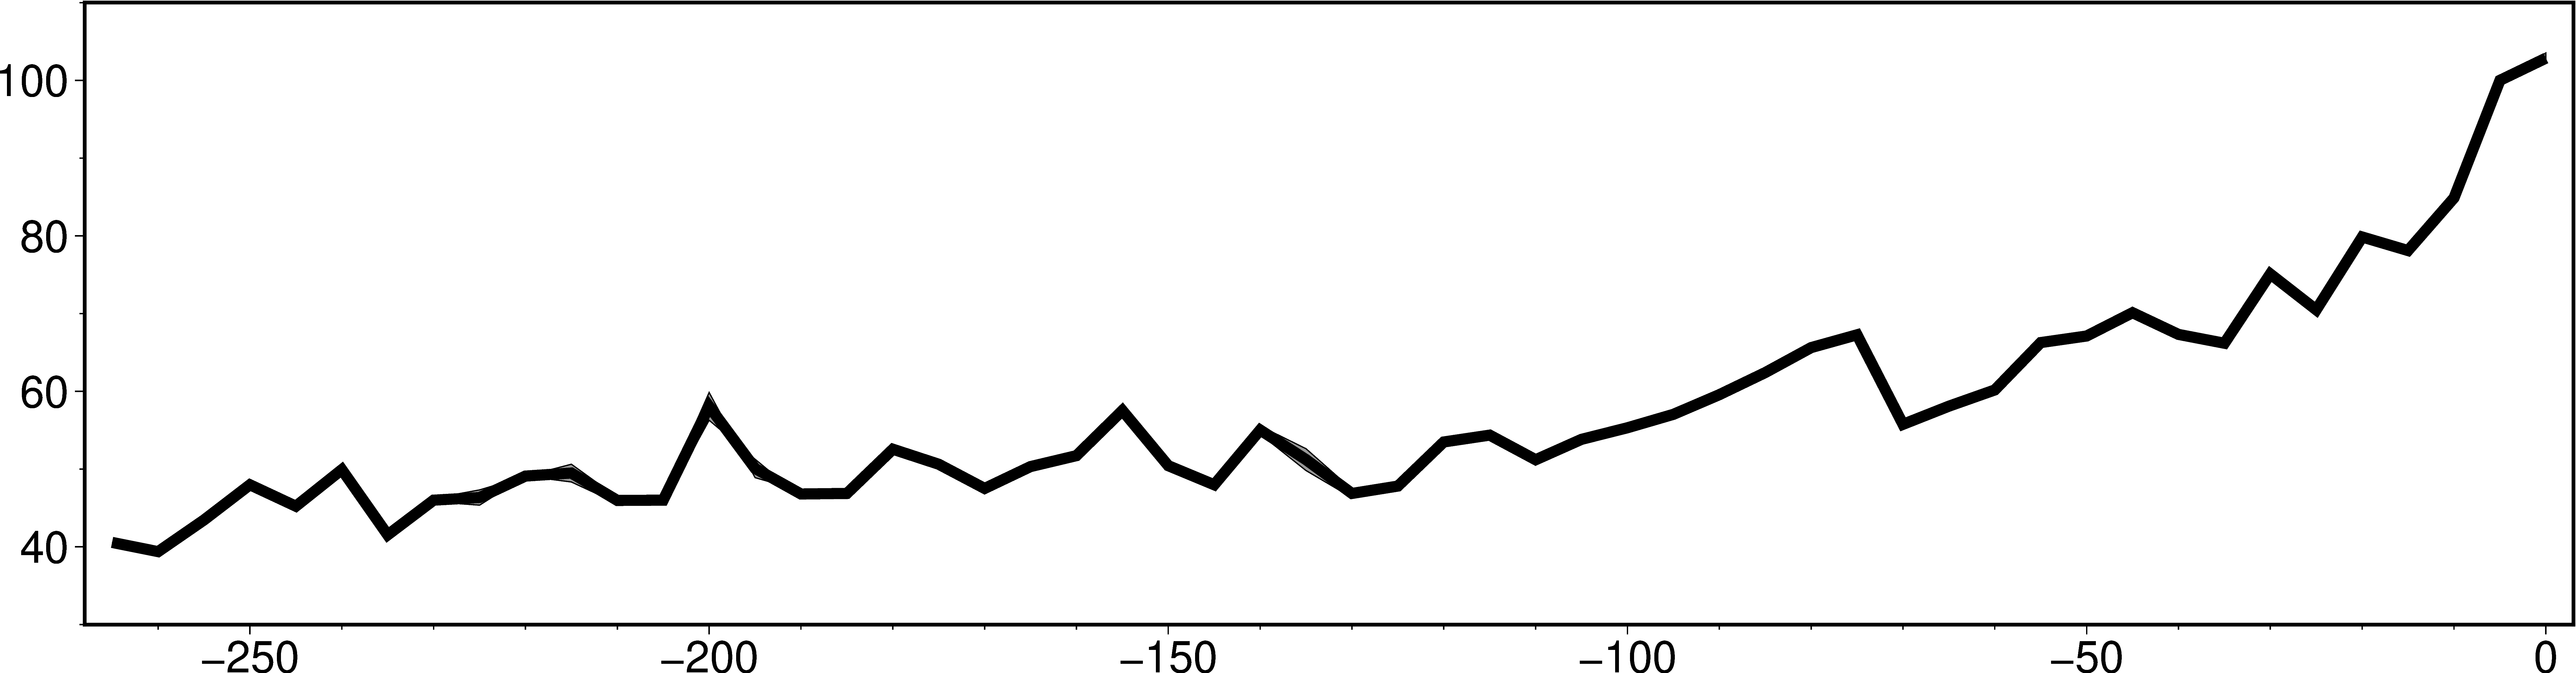

In [156]:
fig = pygmt.Figure()
pygmt.config(
    MAP_FRAME_WIDTH="0.5p",
    MAP_FRAME_TYPE="fancy",
)
font = "4p,Helvetica-Bold"

with pygmt.config(FONT='20p,Helvetica,black'):
    fig.basemap(region=[-268, 3, 30, 110], projection="X40c/10c", frame='af')
    
    fig.plot(data=df_bound4, close="+b+p0.5p,black", 
             color="black@60", pen="1p,black")    
    fig.plot(
        frame="a",
        x=-ntimes,
        y=np.mean(np.vstack((perc1,perc2)),axis=0),
        pen="5p,black",
    )

fig.show(dpi=500, width=1000)
fig.savefig('reconstructPreservation.png',dpi=500, transparent=True)